In [1]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat = spio.loadmat('/Users/devin/ML/machine-learning-ex5/ex5/ex5data1.mat')

In [4]:
m = X.shape[0]
X = mat['X']
X_ones = np.concatenate((np.ones((m,1)),X),axis=1)
y = mat['y'].flatten()
Xtest = mat['Xtest']
ytest = mat['ytest'].flatten()
Xval = mat['Xval']
Xval_ones = np.concatenate((np.ones((Xval.shape[0],1)),Xval),axis=1)
yval = mat['yval'].flatten()

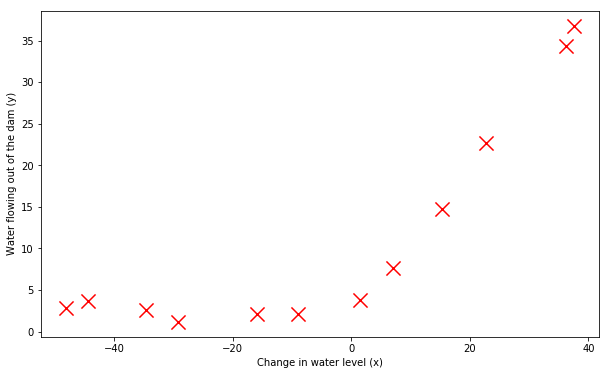

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(X,y,c='r',marker='x',s=200)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')

In [6]:
def linearRegCostFunction(theta, X, y, lamda):
    m = len(y)
    J = (1/(2*m))*sum((np.dot(X,theta) - y)**2) + (lamda / (2*m)) * sum(theta[1:] ** 2)
    grad = (1/m) * np.dot(X.T,(np.dot(X,theta)-y))
    grad[1:] += (lamda / m) * theta[1:]
    return J, grad

In [7]:
theta = np.array([1,1])
lamda = 1

In [8]:
J, grad = linearRegCostFunction(theta, X_ones, y, lamda)

print('''Cost at theta = [1 ; 1]: {}
        (this value should be about 303.993192)'''.format(J))
        
print('''Gradient at theta = [1 ; 1]:  [{}; {}]
         (this value should be about [-15.303016; 598.250744])'''.format(grad[0],grad[1]))

Cost at theta = [1 ; 1]: 303.9931922202643
        (this value should be about 303.993192)
Gradient at theta = [1 ; 1]:  [-15.303015674201186; 598.2507441727035]
         (this value should be about [-15.303016; 598.250744])


In [9]:
lamda = 0

In [10]:
import scipy.optimize as opt

def trainLinearReg(X, y, lamda):
    x0 = np.zeros((X.shape[1],1))
    theta = opt.minimize(linearRegCostFunction, x0,args = (X,y,lamda), method='CG',
                         jac=True,options={'maxiter': 200, 'disp': True})
    return theta.x

In [11]:
theta = trainLinearReg(X_ones, y, lamda)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


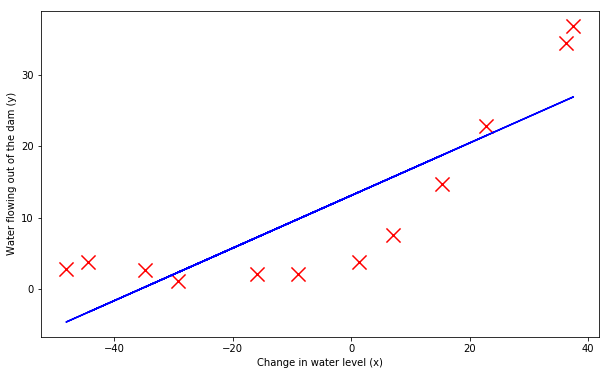

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(X,y,c='r',marker='x',s=200)
ax.plot(X,np.dot(X_ones,theta),'b')
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')

In [13]:
def learningCurve(X, y, Xval, yval, lamda):
    m = X.shape[0]
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    for i in range(m):
        try:
            theta = trainLinearReg(X[:i+1,:],y[:i+1],lamda)
            error_train[i], _ = linearRegCostFunction(theta,X[:i+1,:],y[:i+1],0)
            error_val[i], _ = linearRegCostFunction(theta,Xval,yval,0)
        except ZeroDivisionError:
            pass
    return error_train, error_val

In [14]:
lamda = 0
error_train, error_val = learningCurve(X_ones, y, np.concatenate((np.ones((Xval.shape[0],1)),Xval),axis=1), yval, lamda)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

array([  0,  13,   0, 150])

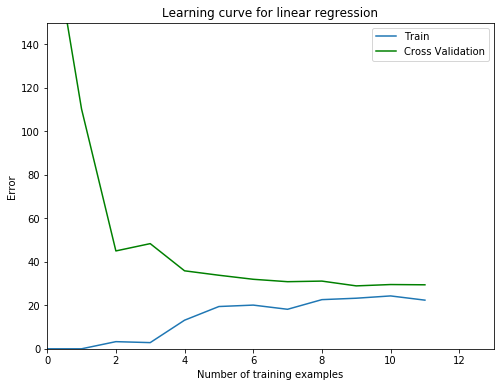

In [15]:
fig, ax = plt.subplots(1,1,**{'figsize':(8,6)})
ax.plot(np.arange(m),error_train,label='Train')
ax.plot(np.arange(m),error_val,c='g',label='Cross Validation')
ax.set_title('Learning curve for linear regression')
ax.legend()
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Error')
ax.axis(np.array([0,13,0,150]))

In [16]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0],p))
    for i in range(p):
        X_poly[:,i] = X.flatten()**(i+1)
    return X_poly

In [17]:
def featureNormalize(X, mu=None, sigma=None):
    X_norm = np.zeros(X.shape)
    if mu is None:
        mu = np.mean(X,axis=0)
    for col in range(X.shape[1]):
        X_norm[:,col] = X[:,col] - mu[col]
    if sigma is None:
        sigma = np.std(X_norm,axis=0)
    for col in range(X_norm.shape[1]):
        X_norm[:,col] = X_norm[:,col] / sigma[col]
    return X_norm, mu, sigma

In [18]:
p = 8

X_poly = polyFeatures(X,p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.concatenate((np.ones((X_poly.shape[0],1)),X_poly),axis=1)

X_poly_test = polyFeatures(Xtest,p)
X_poly_test, _, _ = featureNormalize(X_poly_test, mu, sigma)
X_poly_test = np.concatenate((np.ones((X_poly_test.shape[0],1)),X_poly_test),axis=1)

X_poly_val = polyFeatures(Xval,p)
X_poly_val, _, _ = featureNormalize(X_poly_val, mu, sigma)
X_poly_val = np.concatenate((np.ones((X_poly_val.shape[0],1)),X_poly_val),axis=1)

print(X_poly[0,:])

[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


In [19]:
lamda = 0
theta = trainLinearReg(X_poly, y, lamda)

         Current function value: 0.149488
         Iterations: 200
         Function evaluations: 356
         Gradient evaluations: 356


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 174
         Function evaluations: 305
       

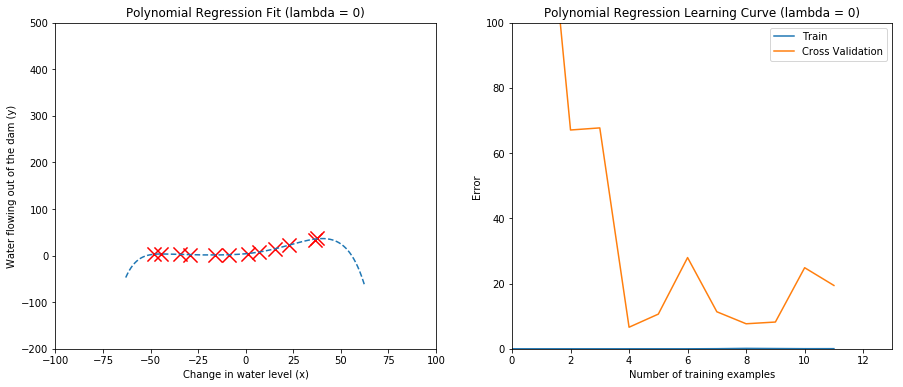

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,**{'figsize':(15,6)})
ax1.scatter(X,y,c='r',marker='x',s=200)
x = np.arange(min(X)-15,max(X)+25,.05)
X_poly_g = polyFeatures(x,p)
X_poly_g, mu, sigma = featureNormalize(X_poly_g,mu,sigma)
X_poly_g = np.concatenate((np.ones((X_poly_g.shape[0],1)),X_poly_g),axis=1)
ax1.plot(x,np.dot(X_poly_g,theta),'--')
ax1.set_xlabel('Change in water level (x)')
ax1.set_ylabel('Water flowing out of the dam (y)');
ax1.set_title ('Polynomial Regression Fit (lambda = %d)' % lamda)
ax1.axis([-100,100,-200,500])

error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lamda)
ax2.plot(np.arange(m), error_train, label='Train') 
ax2.plot(np.arange(m), error_val, label='Cross Validation')
ax2.set_title('Polynomial Regression Learning Curve (lambda = %d)' % lamda)
ax2.set_xlabel('Number of training examples')
ax2.set_ylabel('Error')
ax2.axis([0,13,0,100])
ax2.legend()

In [21]:
print('Polynomial Regression (lambda = %d)\n\n' % lamda)
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(10):
    print('  \t{}\t\t{}\t{}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

Polynomial Regression (lambda = 0)


# Training Examples	Train Error	Cross Validation Error

  	1		0.0	161.44216831742497

  	2		5.1601363962769435e-28	160.79229150111098

  	3		4.617442966332353e-11	67.08492232193525

  	4		2.3158656472721674e-22	67.72684941498797

  	5		5.808903307334302e-17	6.616987134477068

  	6		5.1542575351430536e-08	10.635867096412461

  	7		1.6355433105408948e-08	27.968603662791093

  	8		0.03325975532146853	11.352182092027281

  	9		0.1300110512436118	7.674839394920366

  	10		0.08091887275517229	8.204578720412941



In [22]:
def validationCurve(X, y, Xval, yval):
    lambda_vec =  np.array([0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))
    for i in range(len(lambda_vec)):
        lamda = lambda_vec[i]
        theta = trainLinearReg(X,y,lamda)
        error_train[i,], _ = linearRegCostFunction(theta,X,y,0)
        error_val[i], _ = linearRegCostFunction(theta,Xval,yval,0)
    return lambda_vec, error_train, error_val

         Current function value: 0.100897
         Iterations: 200
         Function evaluations: 369
         Gradient evaluations: 369
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 198
         Function evaluations: 393
         Gradient evaluations: 393
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 191
         Function evaluations: 391
         Gradient evaluations: 391
         Current function value: 0.371284
         Iterations: 195
         Function evaluations: 374
         Gradient evaluations: 362
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 132
         Function evaluations: 225
         Gradient evaluations: 225
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 74
         Function evaluations: 142
         Gradient evaluations: 142
Optimization terminated suc

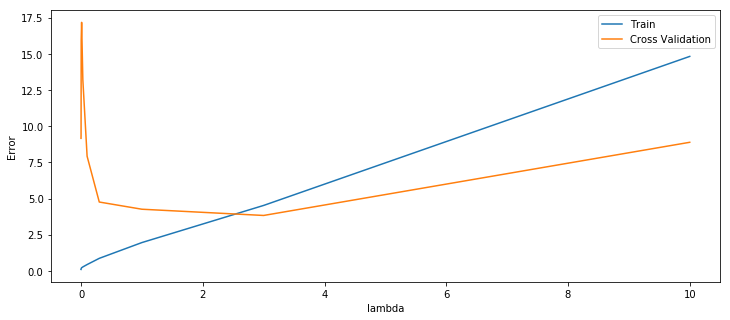

In [23]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.plot(lambda_vec, error_train,label='Train')
ax.plot(lambda_vec, error_val,label='Cross Validation')
ax.legend()
ax.set_xlabel('lambda')
ax.set_ylabel('Error')

In [24]:
print('# Lambda\tTrain Error\tValidation Error\n')
for i in range(10):
    print('  \t{}\t\t{}\t{}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

# Lambda	Train Error	Validation Error

  	1		0.10089702340471493	9.163059028533022

  	2		0.10813191854285967	9.378653383706839

  	3		0.16676165958715117	15.91795294179441

  	4		0.21818282395125238	17.179545727400225

  	5		0.27515480996512437	13.216817252991278

  	6		0.4386547817939044	7.9268480864544415

  	7		0.8681554634737095	4.760833784988635

  	8		1.9586948409502032	4.263358662679102

  	9		4.525104813715837	3.832176382459191

  	10		14.825808260010861	8.889724727083152



In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.arange(min(X)-15,max(X)+25,.05)
X_poly_g = polyFeatures(x,p)
X_poly_g, mu, sigma = featureNormalize(X_poly_g,mu,sigma)
X_poly_g = np.concatenate((np.ones((X_poly_g.shape[0],1)),X_poly_g),axis=1)
model.fit(X_poly,y)
predict = model.predict(X_poly_g)


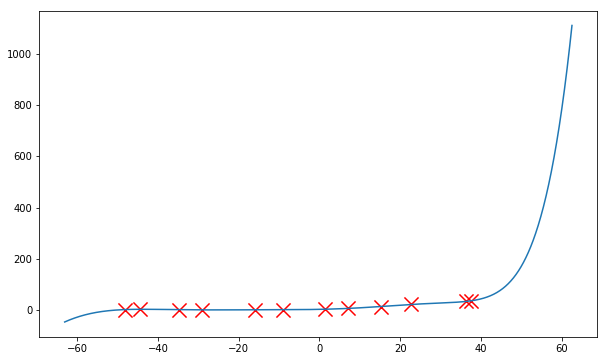

In [26]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(X,y,c='r',marker='x',s=200)
ax.plot(x,predict)
